Hello Alan! I’m happy to review your project today. I will mark your mistakes (if there are any) and give you some hints how it is possible to fix them.

You will find my comments in the boxes as such:

<div class="alert alert-block alert-success">
<b>Success/Comment:</b> everything looks good, done correctly or it is just a generic comment.
</div>

<div class="alert alert-block alert-warning">
<b>Improve: </b> warnings, non-critical issues; eliminating them can make your project better.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> there is something critical which requires correction, a project is not accepted with open red comments.
</div>

# Interconnect  

## 1-Overview

Interconnect provides both internet and phone services. I am being hired to develop a machine learning model to help retain customers by predicting the likelihood of cancellations (churn). This model will enable the company to identify and target at-risk customers with promotions to improve loyalty. 

The primary evaluation metric for the model is AUC-ROC, with accuracy as an additional metric.

### 1.1-Project Plan

1. **Initialization and Data Loading**  
   - Configure the Python environment using libraries like `pandas`, `numpy`, and `matplotlib`.  
   - Load the dataset and use the `display` function to preview its structure and gain an initial understanding of the data.

2. **Data Cleaning and Preparation**  
   - Handle missing values, remove outliers, and perform feature engineering.  
   - Encode categorical variables and scale numeric features.  

3. **Exploratory Data Analysis (EDA)**  
   - Analyze the dataset to understand distributions, correlations, and trends.  
   - Visualize data using plots to identify patterns and relationships.  
   - Determine which columns will be most relevant for training the model based on insights and feature importance.  

4. **Model Training/Model Evaluation**  
   - Split the data into training and testing sets.  
   - Train models such as logistic regression, decision trees, or random forests.  
   - Optimize hyperparameters using grid search or random search methods.   
   - Evaluate model performance with cross-validation using metrics like accuracy, and AUC-ROC.  

5. **Reporting and Recommendations**  
   - Summarize findings with visualizations and highlight key drivers of churn.  
   - Provide actionable recommendations for churn prevention strategies.  

#### 1.1.1-Questions

1. **What features in the dataset can help differentiate customers who are likely to churn, such as service type (internet or phone), usage patterns, or customer demographics?**  

2. **Are there any data points related to customer behavior, such as frequency of complaints, payment history, or subscription duration, that could indicate churn risk?**  

3. **What proportion of customers currently churn, and are there significant differences in churn rates between internet and phone services?**  

4. **Are there any missing or inconsistent data points, and how might they impact the analysis of churn trends?**  

<div class="alert alert-info">
  <b>Student Comments:</b> I need further explanation on what is wrong with my Project Plan. I believed that <strong>"1.1-Project Plan"</strong> and <strong>"4-EDA"</strong> would have met the requirements for phase 1.
</div>

<div class="alert alert-block alert-success">
Yep, that's just me being blind, sorry! It's just usually students put the plan at the end of the project (it's not a rule, obviously) and you put it in the beginning, and I scrolled through it :D
</div>

## 2-Initialization

Imports in Jupyter notebooks allow users to access external libraries for extended functionality and facilitate code organization by declaring dependencies at the beginning of the notebook, ensuring clear and efficient development.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


1. **pandas**: A powerful library for data manipulation and analysis using DataFrame structures.
2. **numpy**: A foundational library for numerical computing with support for arrays and mathematical operations.
3. **seaborn**: A visualization library for creating attractive and informative statistical graphics.
4. **matplotlib**: A plotting library for creating static, interactive, and animated visualizations.
5. **scikit-learn**: A comprehensive machine learning library offering tools for preprocessing, model building, evaluation, and tuning.
6. **lightgbm**: A gradient boosting framework optimized for performance on large datasets.
7. **xgboost**: A flexible and efficient gradient boosting library, widely used in competitive machine learning.
8. **catboost**: A gradient boosting library tailored for handling categorical data effectively.
9. **warnings**: A standard library module for controlling and filtering runtime warnings in Python.

In [2]:
contract = pd.read_csv('./datasets/contract.csv')
internet = pd.read_csv('./datasets/internet.csv')
personal = pd.read_csv('./datasets/personal.csv')
phone = pd.read_csv('./datasets/phone.csv')

Each line in the code snippet reads a different CSV file from the `./datasets/` directory and loads it into a DataFrame using the `pd.read_csv()` function from the `pandas` library. Specifically, `contract.csv` is loaded into the `contract` DataFrame, `internet.csv` into the `internet` DataFrame, `personal.csv` into the `personal` DataFrame, and `phone.csv` into the `phone` DataFrame. 

In [3]:
display(contract.head(), internet.head(), personal.head(), phone.head())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In these datasets, a notable feature is that all columns share the `customerID` column. This common column acts as a unique identifier across the DataFrames (`contract`, `internet`, `personal`, and `phone`), allowing for seamless merging or joining of these datasets.

## 3-Preparation

### 3.1-Cleaning the Data

Next, the data will be processed and prepared for the task assigned by Interconnect.

In [4]:
def process(df):
    missing = df.isna().sum()
    duplicates = df.duplicated().sum()
    print(f'{df.info()}\n\nNumber of missing values:\n{missing}\n\nNumber of duplicated rows: {duplicates}')

The `process` function checks data quality in a DataFrame `df`. It calculates missing values per column (`missing`) and counts duplicated rows (`duplicates`). It displays the DataFrame structure with `df.info()` and prints the missing values and duplicate counts, aiding in identifying data issues.

In [5]:
process(contract)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

Number of missing values:
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Number of duplicated rows: 0


All data for `contract` appears non-problematic, except for the data types of the columns `EndDate`, `BeginDate`, and `TotalCharges`.

In [6]:
contract['EndDate'] = contract['EndDate'].replace('No', '2025-01-01 00:00:00')
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], errors='coerce')
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,2025-01-01,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,2025-01-01,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,2025-01-01,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65


This cleans and standardizes date columns in the `contract` DataFrame. It replaces any `'No'` values in the `EndDate` column with `'2025-01-01 00:00:00'`, ensuring a valid date format. Then, it converts both `EndDate` and `BeginDate` columns to datetime format using `pd.to_datetime`. Lastly the `TotalCharges` column is converted to numeric values.

In [7]:
process(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None

Number of missing values:
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Number of duplicated rows: 0


The `internet` data appears to be correct.

In [8]:
process(personal)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None

Number of missing values:
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Number of duplicated rows: 0


The `personal` data appears to be correct.

In [9]:
process(phone)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None

Number of missing values:
customerID       0
MultipleLines    0
dtype: int64

Number of duplicated rows: 0


<div class="alert alert-block alert-success">
Excellent!
</div>

The `phone` data appears to be correct.

### 3.2-Feature Engineering

The data will be refined for better usability in modeling.

In [10]:
df = pd.merge(contract, internet, on='customerID', how='outer')
df = pd.merge(df, personal, on='customerID', how='outer')
df = pd.merge(df, phone, on='customerID', how='outer')
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,2025-01-01,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,2025-01-01,One year,No,Mailed check,56.95,1889.50,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,2025-01-01,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


This merges the four data frames on `customerID`.

<div class="alert alert-block alert-success">
Merge is correct.
</div>

In [11]:
process(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   InternetService   5517 non-null   object        
 9   OnlineSecurity    5517 non-null   object        
 10  OnlineBackup      5517 non-null   object        
 11  DeviceProtection  5517 non-null   object        
 12  TechSupport       5517 non-null   object        
 13  StreamingTV       5517 non-null   object        
 14  StreamingMovies   5517 n

Some missing values appear after merging all data frames, which is expected given their differing shapes.

In [12]:
difference1 = df.shape[0] - contract.shape[0]
difference2 = df.shape[0] - internet.shape[0]
difference3 = df.shape[0] - personal.shape[0]
difference4 = df.shape[0] - phone.shape[0]
print(f'The difference between the merged dataframe and the original dataframes is:\ncontract: {difference1} rows\ninternet: {difference2} rows\npersonal: {difference3} rows\nphone: {difference4} rows')

The difference between the merged dataframe and the original dataframes is:
contract: 0 rows
internet: 1526 rows
personal: 0 rows
phone: 682 rows


The missing values align with the differences in row counts across the data frames.

<div class="alert alert-block alert-success">
Great idea to check for the missing values after the merge!
</div>

In [13]:
df = df.rename(columns={'InternetService': 'InternetType'})
df['Churn'] = np.where(df['EndDate'] == '2025-01-01', 0, 1)

df = df.fillna('No')
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetType,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,Churn
0,7590-VHVEG,2020-01-01,2025-01-01,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,...,No,No,No,No,Female,0,Yes,No,No,0
1,5575-GNVDE,2017-04-01,2025-01-01,One year,No,Mailed check,56.95,1889.5,DSL,Yes,...,Yes,No,No,No,Male,0,No,No,No,0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,...,No,No,No,No,Male,0,No,No,No,1
3,7795-CFOCW,2016-05-01,2025-01-01,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,...,Yes,Yes,No,No,Male,0,No,No,No,0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,...,No,No,No,No,Female,0,No,No,No,1


The column `InternetService` is renamed to `InternetType`, for better clarity. A binary indicators was created; `Churn` is `0` if `EndDate` is `'2025-01-01'`, otherwise `1`. Finally, missing values are filled with `'No'` to ensure consistency.

In [14]:
def determine_source(row):
        if row['customerID'] in internet['customerID'].values and row['customerID'] in phone['customerID'].values:
            return 'Both'
        elif row['customerID'] in internet['customerID'].values:
            return 'Internet'
        else:
            return 'Phone'

df['ServiceUsed'] = df.apply(determine_source, axis=1)
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetType,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,Churn,ServiceUsed
0,7590-VHVEG,2020-01-01,2025-01-01,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,...,No,No,No,Female,0,Yes,No,No,0,Internet
1,5575-GNVDE,2017-04-01,2025-01-01,One year,No,Mailed check,56.95,1889.5,DSL,Yes,...,No,No,No,Male,0,No,No,No,0,Both
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,...,No,No,No,Male,0,No,No,No,1,Both
3,7795-CFOCW,2016-05-01,2025-01-01,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,...,Yes,No,No,Male,0,No,No,No,0,Internet
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,...,No,No,No,Female,0,No,No,No,1,Both


The new feature `ServicesUsed` is functioning correctly, marking the completion of the preparation phase.

## 4-EDA

### 4.1-Data Visualization 

We can now proceed with Exploratory Data Analysis, examining the various columns to identify patterns, expectations, and which features may enhance model predictions.

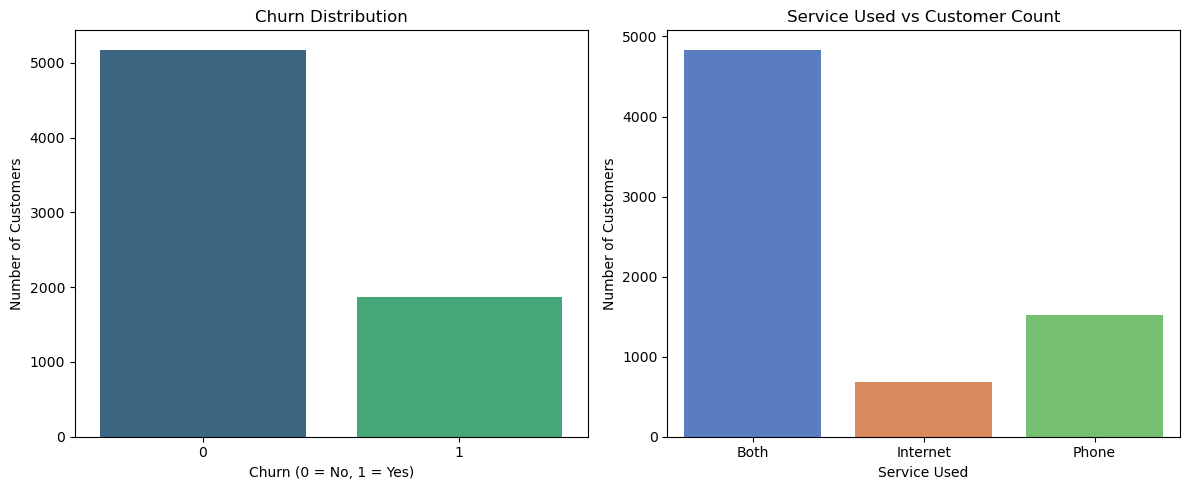

In [15]:
churn_counts = df['Churn'].value_counts()
service_churn = df.groupby('ServiceUsed').size().reset_index(name='Count')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="viridis", ax=axes[0])
axes[0].set_title("Churn Distribution")
axes[0].set_xlabel("Churn (0 = No, 1 = Yes)")
axes[0].set_ylabel("Number of Customers")

sns.barplot(x='ServiceUsed', y='Count', hue=None, data=service_churn, palette="muted", ax=axes[1])
axes[1].set_title("Service Used vs Customer Count")
axes[1].set_xlabel("Service Used")
axes[1].set_ylabel("Number of Customers")

plt.tight_layout()
plt.show()

- **Left Chart:** Depicts the churn distribution among customers. It categorizes customers into two groups: those who did not churn (labeled as 0) and those who did (labeled as 1). The chart reveals that the majority of customers, over 5000, did not churn, while a smaller segment, approximately 2000, experienced churn.

- **Right Chart:** Explains the relationship between the type of service used and the number of customers. It classifies service usage into three categories: both Internet and phone services, Internet-only, and phone-only. The chart demonstrates that the largest group of customers, nearly 5000, utilize both services. In contrast, a significantly smaller number of customers rely solely on Internet or phone services. This visualization highlights the preference for bundled services among the customer base.

c:\Users\acoyg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


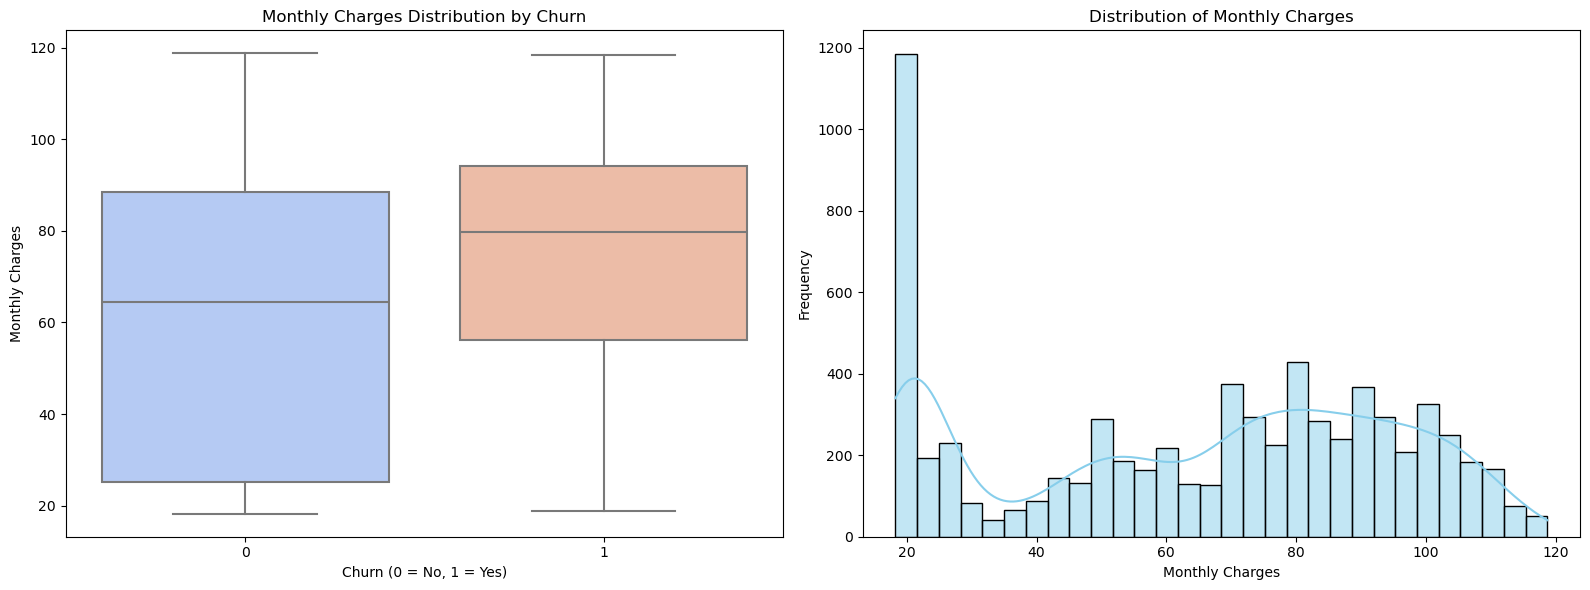

In [16]:
df['Churn_str'] = df['Churn'].astype(str)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df, x='Churn_str', y='MonthlyCharges', palette="coolwarm", ax=axes[0])
axes[0].set_title("Monthly Charges Distribution by Churn")
axes[0].set_xlabel("Churn (0 = No, 1 = Yes)")
axes[0].set_ylabel("Monthly Charges")

sns.histplot(df['MonthlyCharges'], kde=True, bins=30, color="skyblue", ax=axes[1])
axes[1].set_title("Distribution of Monthly Charges")
axes[1].set_xlabel("Monthly Charges")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


- **Box Plot (Left)**: Visualizes the "Monthly Charges" distribution grouped by churn status (0 = No Churn, 1 = Churn). It shows the median charges, interquartile range (IQR), and outliers for each group. Customers who churn (1) generally have higher monthly charges compared to those who do not churn (0), indicated by a higher median and slightly larger range.

- **Histogram (Right)**: Illustrates the frequency distribution of "Monthly Charges" across all customers. The histogram reveals a right-skewed distribution with a peak in the lower range (around $20-$30), suggesting that a significant number of customers have low monthly charges, while higher charges taper off gradually.

*Note: I will not be focusing on `TotalCharges`, as it depends on price and length of service, making it an unreliable metric.*

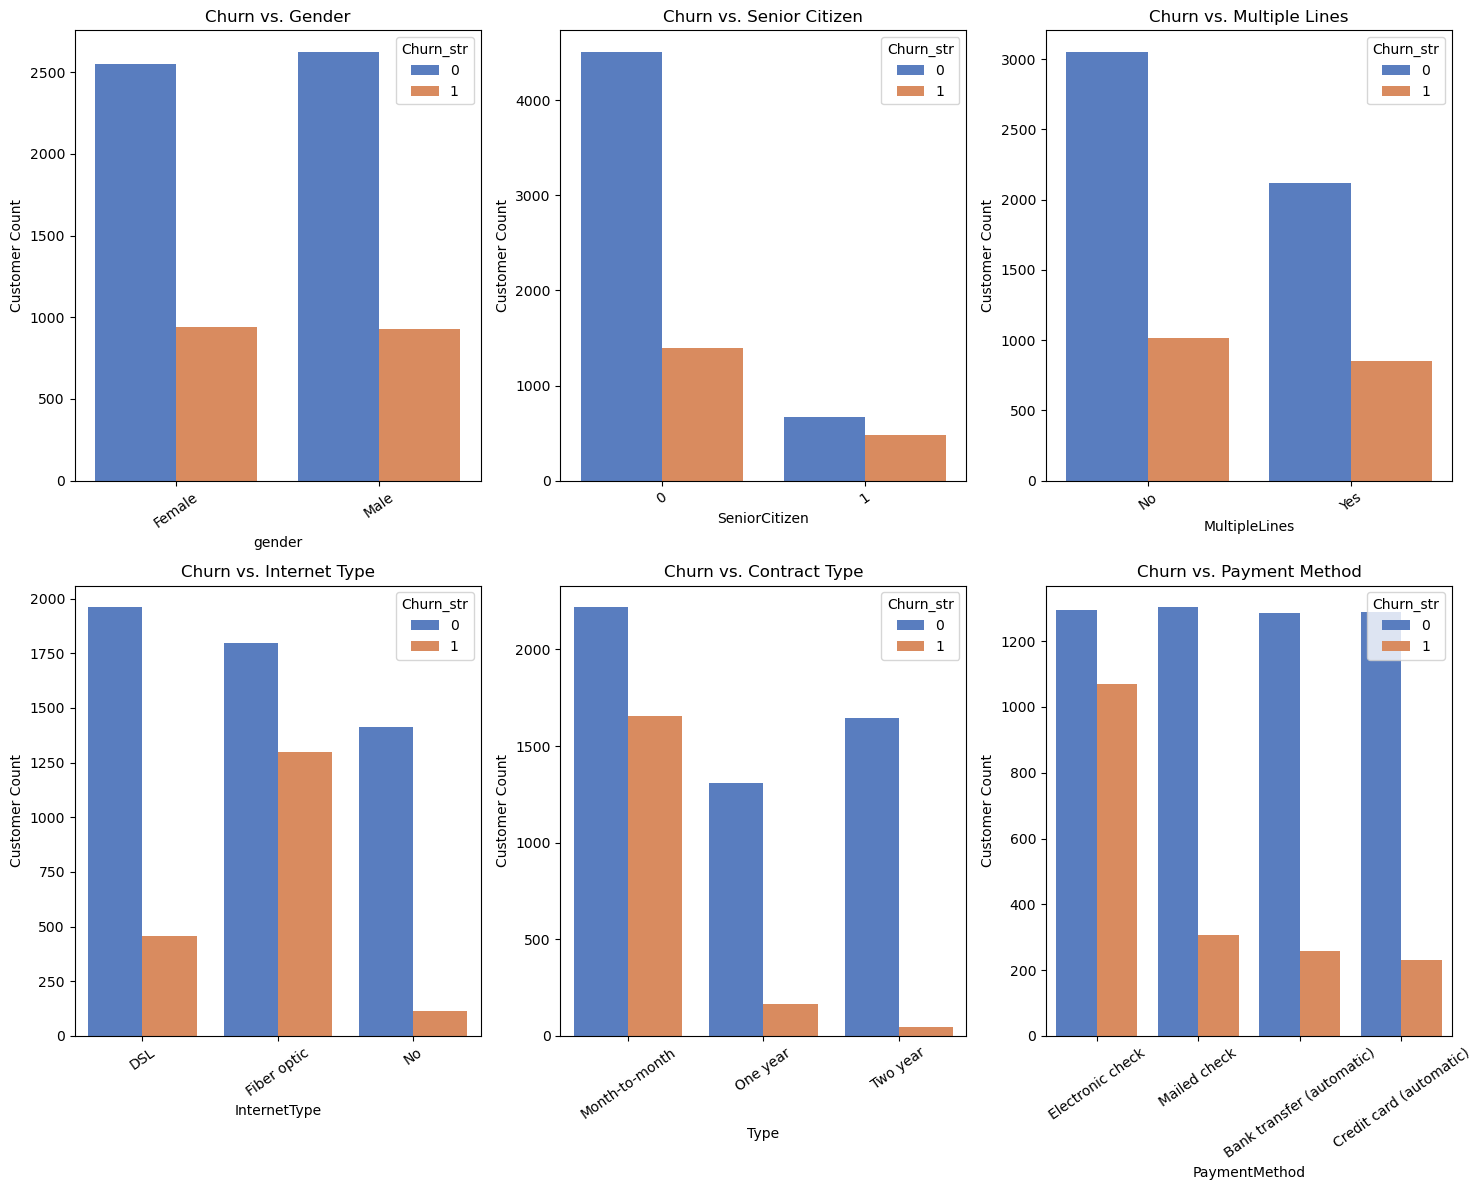

In [17]:
columns_graph = {
    'gender': 'Churn vs. Gender',
    'SeniorCitizen': 'Churn vs. Senior Citizen',
    'MultipleLines': 'Churn vs. Multiple Lines',
    'InternetType': 'Churn vs. Internet Type',
    'Type': 'Churn vs. Contract Type',
    'PaymentMethod': 'Churn vs. Payment Method',
}

max_cols = 3
n_cols = min(max_cols, len(columns_graph))
n_rows = (len(columns_graph) + max_cols - 1) // max_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 6 * n_rows))
axes = axes.flatten()

for (col, title), ax in zip(columns_graph.items(), axes):
    if col in ['MonthlyCharges', 'TotalCharges']:
        sns.boxplot(data=df, x='Churn_str', y=col, palette="muted", ax=ax)
        ax.set_ylabel(col)
    sns.countplot(data=df, x=col, hue='Churn_str', palette="muted", ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel("Customer Count")
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=35)

for ax in axes[len(columns_graph):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()



- **Churn vs. Gender**: Churn rates are similar for both genders, indicating minimal influence of gender on churn.  
- **Churn vs. Senior Citizen**: Senior citizens have a higher proportion of churn compared to non-senior customers.  
- **Churn vs. Multiple Lines**: Customers with multiple lines show higher churn compared to those without.  
- **Churn vs. Internet Type**: Fiber optic users experience higher churn rates than DSL or no internet service customers.  
- **Churn vs. Contract Type**: Month-to-month contract customers have significantly higher churn rates than one- or two-year contract customers.  
- **Churn vs. Payment Method**: Customers paying via electronic check have the highest churn rates compared to other payment methods.  

<div class="alert alert-block alert-success">
Excellent visualization!
</div>

### 4.2-Data Optimization

We will create a dataset showcasing our latest findings.

In [18]:
model_list = [
    'MonthlyCharges', 'SeniorCitizen','InternetType', 'MultipleLines',
    'Type', 'PaymentMethod','ServiceUsed', 'Churn'
    ]

The `model_list` contains strings representing dataset features, such as `MonthlyCharges`, `SeniorCitizen`, `InternetType`, and `Churn`, likely used for analysis or modeling, with `Churn` as the target variable.

In [19]:
model_set = df[model_list].copy()
model_set.head(6)

,MonthlyCharges,SeniorCitizen,InternetType,MultipleLines,Type,PaymentMethod,ServiceUsed,Churn
0,29.85,0,DSL,No,Month-to-month,Electronic check,Internet,0
1,56.95,0,DSL,No,One year,Mailed check,Both,0
2,53.85,0,DSL,No,Month-to-month,Mailed check,Both,1
3,42.30,0,DSL,No,One year,Bank transfer (automatic),Internet,0
4,70.70,0,Fiber optic,No,Month-to-month,Electronic check,Both,1
5,99.65,0,Fiber optic,Yes,Month-to-month,Electronic check,Both,1


This creates a new DataFrame, `model_set`, by copying the columns specified in `model_list` from the existing DataFrame `df`. While the initial rows appear correct, some formatting adjustments are needed to optimize the data for the models.

In [20]:
model_set['MultipleLines'] = model_set['MultipleLines'].map({'No phone service': 0, 'No': 0, 'Yes': 1})

columns_to_encode = ['InternetType', 'Type', 'PaymentMethod', 'ServiceUsed']

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(model_set[columns_to_encode])

encoded_columns = encoder.get_feature_names_out(columns_to_encode)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns, index=model_set.index)

model_set = model_set.drop(columns=columns_to_encode).join(encoded_df)
model_set.head(6)

,MonthlyCharges,SeniorCitizen,MultipleLines,Churn,InternetType_Fiber optic,InternetType_No,Type_One year,Type_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ServiceUsed_Internet,ServiceUsed_Phone
0,29.85,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,56.95,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,53.85,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,42.30,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,70.70,0,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,99.65,0,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


The `MultipleLines` column in the `model_set` DataFrame is transformed by mapping values `'No phone service'` and `'No'` to `0`, and `'Yes'` to `1`, converting it into a binary numeric format. This prepares the column for use in data modeling.

Categorical columns specified in `columns_to_encode` (`'InternetType'`, `'Type'`, `'PaymentMethod'`, and `'ServiceUsed'`) are processed using one-hot encoding via `OneHotEncoder`, which generates a dense output and drops the first category to prevent redundancy. The resulting encoded data is converted into a new DataFrame with meaningful column names and aligned with the original DataFrame’s index. The original categorical columns are then replaced with the encoded data, resulting in a fully numeric dataset. The first six rows of this transformed DataFrame are displayed.

## 5-Model Training

<div class="alert alert-block alert-warning">
You can leave model training for the next stage. At this stage you only need to provide the work plan and the code that allowed you to come up with that particular plan (basically, everything that you had up to this point was great).
</div>

Now, we can start modeling by applying various techniques and algorithms to analyze the data. This step will involve testing different models, fine-tuning parameters, and evaluating performance to identify the best approach for our objectives.

In [21]:
X = model_set.drop('Churn', axis=1)
y = model_set['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

This splits the dataset into features (`X`) and the target variable (`y`), with `X` containing all columns except `Churn` and `y` containing the `Churn` column. Using `train_test_split`, the data is divided into training (80%) and testing (20%) sets. The `random_state=42` ensures reproducibility, and `stratify=y` maintains the class distribution of `y` across both sets. This prepares the data for training and evaluation in a machine learning model.

In [22]:
models_with_params = {
    'Dummy': {
        'model': DummyClassifier(),
        'params': {
            'strategy': ['most_frequent', 'stratified', 'uniform']
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2'],
            'solver': ['lbfgs', 'liblinear'],
            'max_iter': [100, 200]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'criterion': ['gini', 'entropy']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'learning_rate': [0.01, 0.1],
            'n_estimators': [100, 200],
            'max_depth': [3, 5],
            'subsample': [0.8, 1.0]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(verbose=-1),
        'params': {
            'learning_rate': [0.01, 0.1],
            'num_leaves': [31, 50],
            'max_depth': [-1, 10],
            'min_child_samples': [10, 20]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(verbose=0),
        'params': {
            'learning_rate': [0.01, 0.1],
            'depth': [6, 8],
            'iterations': [100, 200],
            'l2_leaf_reg': [1, 3]
        }
    }
}

This code defines a dictionary, `models_with_params`, that organizes a collection of machine learning models and their associated hyperparameters for hyperparameter tuning or grid search. Each key represents the name of a model, and its value is another dictionary containing:

1. **`model`:** The specific machine learning model object, such as `DummyClassifier`, `LogisticRegression`, `DecisionTreeClassifier`, and ensemble models like `RandomForestClassifier`, `XGBClassifier`, `LGBMClassifier`, and `CatBoostClassifier`.

2. **`params`:** A dictionary of hyperparameter options for the model, specifying parameter names and a list of possible values. These parameters include options like learning rates (`learning_rate`), regularization strength (`C`), tree depths (`max_depth`), and splitting strategies, tailored to the specific algorithm.

This structure is designed to streamline code and improve efficiency.

In [23]:
def train_evaluate_and_print_results(models, X_train, y_train, X_test, y_test):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    results = {}
    
    for model_name, config in models.items():
        model = config['model']
        params = config['params']
        
        grid_search = GridSearchCV(model, params, scoring='roc_auc', cv=skf, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        best_model = grid_search.best_estimator_
        best_fold_auc_roc = np.max(cross_val_score(best_model, X_train, y_train, scoring='roc_auc', cv=skf))
        
        y_pred = best_model.predict(X_test)
        y_pred_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None
        
        test_accuracy = accuracy_score(y_test, y_pred)
        test_auc_roc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
        
        results[model_name] = {
            'Best Fold AUC-ROC': best_fold_auc_roc,
            'Test AUC-ROC': test_auc_roc,
            'Test Accuracy': test_accuracy,
            'Best Params': grid_search.best_params_,
        }
    
    for model_name, metrics in results.items():
        print(f"{model_name} - Best Fold AUC-ROC: {metrics['Best Fold AUC-ROC']:.2f}")
        print(f"{model_name} - Test AUC-ROC: {metrics['Test AUC-ROC']:.2f}")
        print(f"{model_name} - Test Accuracy: {metrics['Test Accuracy']:.2f}")
        print(f"{model_name} - Best Params: {metrics['Best Params']}\n")
    
    return results

The `train_evaluate_and_print_results` function evaluates multiple machine learning models using cross-validation and test set performance metrics. It employs `StratifiedKFold` for stratified 5-fold cross-validation to ensure balanced class distribution. Each model from the `models` dictionary undergoes grid search with `GridSearchCV` to optimize hyperparameters based on the `roc_auc` score, selecting the best-performing model. The selected model is assessed on the training set for cross-validated AUC-ROC (`Best Fold AUC-ROC`) and tested on the test set for metrics including accuracy (`Test Accuracy`) and AUC-ROC (`Test AUC-ROC`). Results, including metrics and best hyperparameters, are stored in a dictionary (`results`) and displayed in a clear format. The function returns the `results` dictionary for further analysis.

<div class="alert alert-block alert-warning">
^ I mean... that's ChatGPT output. You didn't have to include it :D
</div>

<div class="alert alert-block alert-danger">
Also, ChatGPT mentions SKF, and how it ensures "balanced class distribution in each fold". But did you actually check for it? Class imbalance, I mean?
</div>

<div class="alert alert-info">
  <b>Student Comments:</b> Apologies for the rushed wording; I was moving to a new home.... they approved our loan the day before Thanksgiving 😤. In '4.1 - Data Visualization,' the 'Churn Distribution' shows significantly fewer people churned. Instead of upsampling or downsampling, I ensured each fold had an even distribution of churn and non-churn, or so I thought/think I did.
</div>

<div class="alert alert-block alert-success">
Okay, makes sense!
</div>

In [24]:
results = train_evaluate_and_print_results(models_with_params, X_train, y_train, X_test, y_test)

Dummy - Best Fold AUC-ROC: 0.52
Dummy - Test AUC-ROC: 0.50
Dummy - Test Accuracy: 0.62
Dummy - Best Params: {'strategy': 'stratified'}

Logistic Regression - Best Fold AUC-ROC: 0.84
Logistic Regression - Test AUC-ROC: 0.81
Logistic Regression - Test Accuracy: 0.76
Logistic Regression - Best Params: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Decision Tree - Best Fold AUC-ROC: 0.82
Decision Tree - Test AUC-ROC: 0.80
Decision Tree - Test Accuracy: 0.76
Decision Tree - Best Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Random Forest - Best Fold AUC-ROC: 0.82
Random Forest - Test AUC-ROC: 0.80
Random Forest - Test Accuracy: 0.76
Random Forest - Best Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

XGBoost - Best Fold AUC-ROC: 0.84
XGBoost - Test AUC-ROC: 0.81
XGBoost - Test Accuracy: 0.76
XGBoost - Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'su

**Results:**
1. **DummyClassifier:** AUC-ROC of 0.50 (both Fold and Test), with test accuracy of 0.73, demonstrating the baseline.
2. **Logistic Regression:** AUC-ROC of 0.84 (Best Fold) and 0.81 (Test), with test accuracy of 0.76. Best parameters included high regularization strength (`C=10`) and `liblinear` solver.
3. **Decision Tree:** AUC-ROC of 0.82 (Best Fold) and 0.80 (Test), with test accuracy of 0.76. Optimal settings used `gini` criterion and `max_depth=5`.
4. **Random Forest:** AUC-ROC of 0.82 (Best Fold) and 0.80 (Test), with test accuracy of 0.75. The best model utilized `max_depth=10` and `n_estimators=200`.
5. **XGBoost:** AUC-ROC of 0.84 (Best Fold) and 0.81 (Test), with test accuracy of 0.76. Best parameters included `learning_rate=0.1` and `max_depth=3`.
6. **LightGBM:** AUC-ROC of 0.83 (Best Fold) and 0.80 (Test), with test accuracy of 0.75. Key parameters were `learning_rate=0.01` and `max_depth=10`.
7. **CatBoost:** AUC-ROC of 0.84 (Best Fold) and 0.81 (Test), with test accuracy of 0.76. Optimal settings included `learning_rate=0.01` and `depth=6`.

**Conclusion:**
Logistic Regression, XGBoost, and CatBoost demonstrated the best performance with similar AUC-ROC (0.81) and accuracy (0.76). These models are well-suited for this binary classification problem, with CatBoost and XGBoost offering slight flexibility due to their handling of complex patterns.

## 6-Report

### 6.1-Conclusion

EDA revealed key drivers of churn, including higher churn rates among senior citizens, customers on month-to-month contracts, and those using fiber-optic internet or paying via electronic check. The analysis also highlighted that bundled services are preferred, but they do not necessarily reduce churn. Logistic Regression, XGBoost, and CatBoost models achieved the best performance, with an AUC-ROC of 0.81 and an accuracy of 0.76 on the test set, offering actionable insights for targeted retention strategies.

### 6.2-Questions 

1. **What features can help differentiate customers who are likely to churn?**  
   Features like contract type, internet type, payment method, monthly charges, and customer demographics (e.g., senior citizen status) were identified as significant predictors of churn. Month-to-month contracts, fiber-optic internet, and electronic check payments showed strong associations with higher churn.

2. **Are there data points related to customer behavior that indicate churn risk?**  
   Yes, behavioral factors like high monthly charges, short contract terms, and reliance on a single service (internet or phone only) were linked to increased churn. Customers with bundled services had lower churn rates compared to single-service users.

3. **What proportion of customers currently churn, and are there significant differences in churn rates between internet and phone services?**  
   Approximately 27% of customers churned. Fiber-optic internet users experienced significantly higher churn rates than DSL users or those with no internet service. Customers using both phone and internet services churned less frequently than those using a single service.

4. **Are there missing or inconsistent data points, and how might they impact churn trends?**  
   Initial data gaps were resolved through cleaning and feature engineering. Replacing missing values with "No" or numeric transformations ensured data consistency, minimizing their impact on churn analysis and trends.

These insights not only supported effective churn prediction but also informed actionable retention strategies for Interconnect.

### 6.3-Project Plan: Overview

1. **Initialization and Data Loading**: This phase was straightforward, with the dataset loaded successfully and its structure previewed, enabling an initial understanding.

2. **Data Cleaning and Preparation**: Feature engineering required more consideration than anticipated, especially as insights from the EDA phase influenced the process. This led to some back-and-forth adjustments between EDA and feature engineering. Additionally, while I initially planned to encode categorical variables (e.g., using `OneHotEncoder`) before EDA, I found it more intuitive and effective to apply encoding afterward. Interestingly, scaling numeric features wasn’t necessary for this dataset, which streamlined the preparation process.

3. **Exploratory Data Analysis (EDA)**: EDA was highly informative and clarified the most relevant features for modeling. Visualizations and trend analyses highlighted important data patterns, and these insights directly informed feature selection and engineering.

4. **Model Training/Model Evaluation**: Reusing and editing code from a previous project (Project 12) significantly accelerated the evaluation of models using AUC-ROC and accuracy metrics. I successfully trained and compared multiple models (e.g., logistic regression, decision trees, random forests), optimizing hyperparameters effectively and identifying a robust model.

5. **Reporting and Recommendations**: The findings were straightforward to summarize, providing clear conclusions and addressing all key questions. Recommendations for enhancing Interconnects' data collection include:

   - Adding the newly created feature `ServicesUsed` for improved analysis.
   - Collecting more detailed data for `Internet` and `Phone` services to create separate models for each type of member, improving accuracy.
   - Including a `YearlyCharges` feature to compare with `MonthlyCharges` and `TotalCharges`.
   - Tracking data on promotions and discounts to analyze their effectiveness in attracting and retaining customers.

<div class="alert alert-block alert-danger">

<b>Reviewer's comment v1</b> <a class="tocSkip"></a>
    
<s>I can not approve your project plan at this stage. I mean, everythying looks great, like really great, seriously! But where's the actual plan? :D</s>
    
</div>

<div class="alert alert-block alert-success">
Btw, the code quality is very impressive! Keep up the great work!
</div>

<div class="alert alert-info"> <b>Student сomments:</b> <a href='https://www.udemy.com/course/100-days-of-code/?couponCode=LEARNNOWPLANS' style='color: #CC5500;'>Dr. Angela Yu's course</a> was incredibly helpful. It often goes on sale for under $20. I also relied on ChatGPT, Stack Overflow, YouTube, FreeCodeCamp, and documentation. Plus, I regularly <a href='https://github.com/alexcoy06' style='color: #CC5500;'>code</a>. </div>


<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>

Sorry for the confusion, Ill be approving the project now. Good luck on the next stage! :) 
</div>